# Smart Agriculture System

In [1]:
pip install scikit-fuzzy  

Note: you may need to restart the kernel to use updated packages.


/Users/gurubalan/anaconda3/lib/python3.11/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


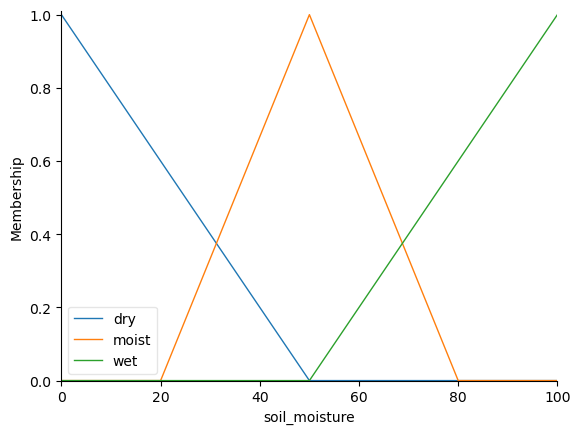

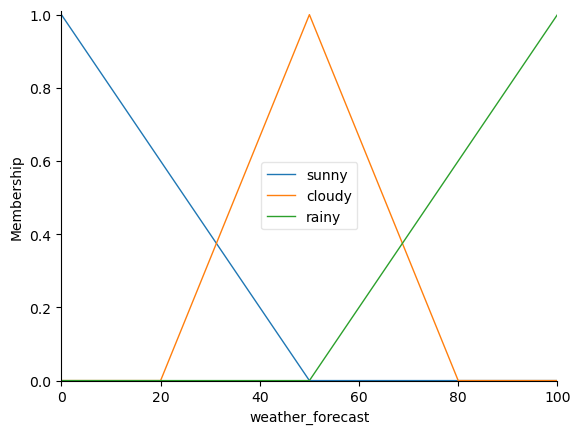

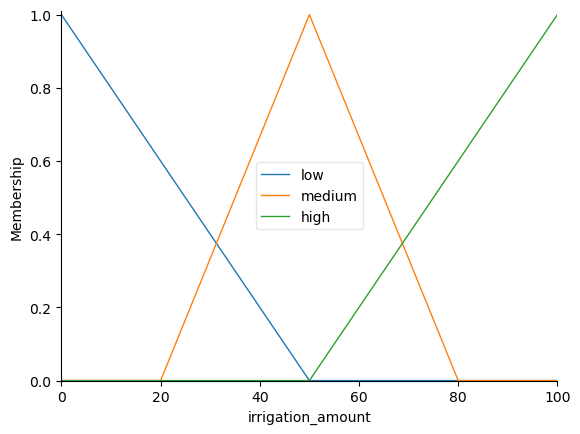

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define fuzzy variables
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
weather_forecast = ctrl.Antecedent(np.arange(0, 101, 1), 'weather_forecast')
irrigation_amount = ctrl.Consequent(np.arange(0, 101, 1), 'irrigation_amount')

# Define membership functions
soil_moisture['dry'] = fuzz.trimf(soil_moisture.universe, [0, 0, 50])
soil_moisture['moist'] = fuzz.trimf(soil_moisture.universe, [20, 50, 80])
soil_moisture['wet'] = fuzz.trimf(soil_moisture.universe, [50, 100, 100])

weather_forecast['sunny'] = fuzz.trimf(weather_forecast.universe, [0, 0, 50])
weather_forecast['cloudy'] = fuzz.trimf(weather_forecast.universe, [20, 50, 80])
weather_forecast['rainy'] = fuzz.trimf(weather_forecast.universe, [50, 100, 100])

irrigation_amount['low'] = fuzz.trimf(irrigation_amount.universe, [0, 0, 50])
irrigation_amount['medium'] = fuzz.trimf(irrigation_amount.universe, [20, 50, 80])
irrigation_amount['high'] = fuzz.trimf(irrigation_amount.universe, [50, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(soil_moisture['dry'] & weather_forecast['sunny'], irrigation_amount['high'])
rule2 = ctrl.Rule(soil_moisture['moist'] & weather_forecast['cloudy'], irrigation_amount['medium'])
rule3 = ctrl.Rule(soil_moisture['wet'] & weather_forecast['rainy'], irrigation_amount['low'])

# Create control system
irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

# Compute irrigation
irrigation = ctrl.ControlSystemSimulation(irrigation_ctrl)

# Set inputs
irrigation.input['soil_moisture'] = 70
irrigation.input['weather_forecast'] = 30

# Compute the result
irrigation.compute()

# Visualize the result
soil_moisture.view()
weather_forecast.view()
irrigation_amount.view()
plt.show()
